
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Assignment 4 - Function Approximators Part 2: Deep Q Network </b></center></h2>

<br>
<center><font size="3">This notebook is a part of teaching material for ELEC-E8125</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Introduction </a>
* <a href='#1.1'> 1.1 Task environments </a>
* <a href='#1.2'> 1.2 Learning Objectives </a>
* <a href='#1.3'> 1.3 Code Structure & Files </a>
* <a href='#1.4'> 1.4 Execution time </a>
* <a href='#2.'> 2. A (not-so-)deep Q-network</a>
* <a href='#3.'> 3. Submitting </a>
* <a href='#3.1'> 3.1 Feedback </a>

<a href='#T1'><b>Student Task 1.</b> Implementing DQN (10 points) </a>\
<a href='#Q1'><b>Student Question 1.1</b> Considering Continuous Action Spaces (5 points) </a>\
<a href='#Q2'><b>Student Question 1.2</b> Continuous Action Spaces Part 1 (15 points) </a>\
<a href='#Q3'><b>Student Question 1.3</b> The Target Network (10 points) </a>
 

**Total Points:** 40

**Estimated runtime of all the cells:** 2 hours

# 1. Introduction <a id='1.'></a>

In various real-world scenarios, dealing with high-dimensional state spaces makes it impractical to compute and store Q-values for every possible state-action pair in a Q-table. To address this challenge, we turn to function approximators. In this assignment, you will progress creating a basic Deep Q-Network (DQN) in the **Cartpole** and **LunarLander** environment.

**Please start working on this assignment early since the DQN will take some time to train.**


<div style="display:flex">
     <div style="flex:1;padding-left:100px;">
          <img src="imgs/cartpole.png" width="300"/>
         <figcaption style="flex:1;padding-left:20px;">  Figure 1: The Cartpole environment. </figcaption>
     </div>
     <div style="flex:1;padding-left:70px;">
          <img src="imgs/lunar_lander.png" width="300"/>
         <figcaption style="flex:1;padding-left:20px;">  Figure 2: The Lunarlander environment. </figcaption>
     </div>

</div>

Useful Sources:

- Mnih, Volodymyr, et al. "Playing atari with deep reinforcement learning." arXiv preprint arXiv:1312.5602 (2013). https://arxiv.org/pdf/1312.5602.pdf


## 1.1 Task environments: <a id='1.1'></a>
In this excercise, we will mainly use DQN for two tasks:
- Cartpole(https://gymnasium.farama.org/environments/classic_control/cart_pole/): This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in “Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem”. A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.

- Lunar Lander (https://gymnasium.farama.org/environments/box2d/lunar_lander/): This environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

## 1.2 Learning Objectives: <a id='1.1'></a>
- Understand why and how function approximators can be used for Q-learning
- Understand the Deep Q-Network RL algorithm

## 1.3 Code Structure & Files <a id='1.2'></a>

```ex4_dqn.ipynb``` is the file needed to be modified for this part of the assignment.  

<span style="color:red"> **# IMPORTANT: DO NOT FORGET ANOTHER TASK IN ```ex4_rbf.ipynb```** </span>

```
├───cfg                            # Config files for environments
├───imgs                           # Images used in notebook
├───results
│   └───CartPole-v1
│   │   ├───logging                
│   │   │    └───logging.pkl        # Contains logged data
│   │   ├───model              
│   │   │    └───*dqn.pt            # Contains trained model
│   │   └───video                   # Videos saved
│   │   └───*cartpole_dqn.png       # Contains training performance plot
│   └───LunarLander-v2
│   │   ├───logging                
│   │   │    └───logging.pkl        # Contains logged data
│   │   ├───model              
│   │   │    └───*dqn.pt            # Contains trained model
│   │   └───video                   # Videos saved
│   │   └───*lunarlander_dqn.png    # Contains training performance plot
│   ex4_dqn.ipynb                   # 2nd assignment file containing tasks <---------This task
│   ex4_rbf.ipynb                   # 1st assignment file containing tasks <---------
│   train.py                        # Contains train and test functions 
│   utils.py                        # Contains useful functions 
└───buffer.py                       # Contains buffer functions
```

## 1.4 Execution time <a id='1.4'></a>

The training of these methods might take more than 40 mins depends on the server. If you have problem of experiment running takes too much time, you can download the jupyter notebook and test it locally.

## Warnings:

- Don’t copy and paste cells within a notebook. This will mess up the tracking metadata and prevent autograding from working.
- Only add new cells using the '+' button in the upper toolbar and do not split cells.
- Be cautious about things such as copying the whole notebook to Colab to work on it. This has sometimes resulted in removing all notebook metadata, making autograding impossible.

# 2. A (not-so-)deep Q-network <a id='2.'></a>

<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1.</b> Implementing DQN (10 points) </h3> 

Finish the incomplete code in DQNAgent (functions ```update``` and ```get_action```, marked with ```TODO```) to implement a DQN agent.

**See Figure 3 for an example training performance plot for cartpole. Save the training performance plots, and check if they are in the right place (the paths please refer to <a href='#3.'>Submitting<a>).**

<figure style="text-align: center">
<img src="imgs/dqn.png" width="300px">
<figcaption style="text-align: center"> Figure 3: The training performance plot for cartpole-dqn might look something like this. </figcaption>
</figure>
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [41]:
    skip_training = True  # Set this flag to True before validation and submission

In [3]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
from typing import List
import numpy as np
import torch, random, copy, yaml, time
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from pathlib import Path

import utils as u
import train as t

from IPython.display import Video # to display videos

device = 'cpu'

In [4]:
def mlp(in_dim, mlp_dims: List[int], out_dim, act_fn=nn.ReLU, out_act=nn.Identity):
    """Returns an MLP."""
    if isinstance(mlp_dims, int): raise ValueError("mlp dimensions should be list, but got int.")

    layers = [nn.Linear(in_dim, mlp_dims[0]), act_fn()]
    for i in range(len(mlp_dims)-1):
        layers += [nn.Linear(mlp_dims[i], mlp_dims[i+1]), act_fn()]
    # the output layer
    layers += [nn.Linear(mlp_dims[-1], out_dim), out_act()]
    return nn.Sequential(*layers)

In [11]:
class DQNAgent(object):
    def __init__(self, state_shape, n_actions,
                 batch_size=32, hidden_dims=[12], gamma=0.98, lr=1e-3, grad_clip_norm=1000, tau=0.001):
        self.n_actions = n_actions
        self.state_dim = state_shape[0]
        self.policy_net = mlp(self.state_dim, hidden_dims, n_actions).to(device)
        self.target_net = copy.deepcopy(self.policy_net)
        self.target_net.eval()
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=float(lr))

        self.batch_size = batch_size
        self.gamma = gamma
        self.grad_clip_norm = grad_clip_norm
        self.tau = tau
        
        self.counter = 0

    def update(self, buffer):
        """ One gradient step, update the policy net."""
        start = time.perf_counter()
        self.counter += 1
        # Do one step gradient update
        batch = buffer.sample(self.batch_size, device=device)
        # Hint:
        #    state = batch.state
        #    action = batch.action 
        #    next_state = batch.next_state
        #    reward = batch.reward 
        #    not_done = batch.not_done 
        
        # TODO: Task 3: Finish the DQN implementation.
        # Hints: 1. You can use torch.gather() to gather values along an axis specified by dim. 
        #        2. torch.max returns a namedtuple (values, indices) where values is the maximum 
        #           value of each row of the input tensor in the given dimension dim.
        #           And indices is the index location of each maximum value found (argmax).
        #        3.  batch is a namedtuple, which has state, action, next_state, not_done, reward
        #           you can access the value be batch.<name>, e.g, batch.state
        #        4. check torch.nn.utils.clip_grad_norm_() to know how to clip grad norm
        #        5. You can go throught the PyTorch Tutorial given on MyCourses if you are not familiar with it. 
        # calculate the q(s,a)
        ########## You code starts here #########
        
        qs_all = self.policy_net(batch.state)              # [B, n_actions]

        # Ensure actions have shape [B, 1] for gather
        actions = batch.action.long()
        if actions.dim() == 1:
            actions = actions.unsqueeze(1)                 # [B, 1]

        # Pick the Q-values for the taken actions -> [B]
        q_sa = qs_all.gather(1, actions)                   # [B, 1]
        qs = q_sa.squeeze(1)                               # [B]

        with torch.no_grad():
            # Target side: max_a' Q_target(s', a')
            q_next_all = self.target_net(batch.next_state) # [B, n_actions]
            q_next_max = q_next_all.max(dim=1).values      # [B]

            # Rewards and not_done as 1-D [B]
            rewards = batch.reward.squeeze()               # [B]
            not_done = batch.not_done.squeeze()            # [B]

            # Bellman target: r + gamma * not_done * max_a' Q_target(s', a')
            target = rewards + self.gamma * not_done * q_next_max  # [B]

        # MSE loss between current estimates and targets
        loss = F.mse_loss(qs, target)

        # Standard optimization step
        self.optimizer.zero_grad()
        loss.backward()
        if self.grad_clip_norm is not None:
            torch.nn.utils.clip_grad_norm_(self.policy_net.parameters(), self.grad_clip_norm)
        self.optimizer.step()
            
            
        ########## You code ends here #########

        # update the target network
        u.soft_update_params(self.policy_net, self.target_net, self.tau)
        
        end = time.perf_counter()
        update_time = end - start
        return {'loss': loss.item(), 
                'q_mean': qs.mean().item(),
                'num_update': self.counter,
                'update_time': update_time}


    @torch.no_grad()
    def get_action(self, state, epsilon=0.05):
        # TODO:  Task 3: implement epsilon-greedy action selection
        ########## You code starts here #########
        
        # Make a float32 tensor on the right device
        if not torch.is_tensor(state):
            state_t = torch.tensor(state, dtype=torch.float32, device=device)
        else:
            state_t = state.to(device)

        # Ensure a batch dimension: [state_dim] -> [1, state_dim]
        if state_t.dim() == 1:
            state_t = state_t.unsqueeze(0)

        # ε-greedy
        p = np.random.uniform(0, 1)
        if p < epsilon:
            action = int(np.random.choice(self.n_actions))
        else:
            q_values = self.policy_net(state_t)            # [1, n_actions]
            action = int(q_values.argmax(dim=1).item())
        ########## You code ends here #########
        return action


    def save(self, fp):
        path = fp/'dqn.pt'
        torch.save({
            'policy': self.policy_net.state_dict(),
            'policy_target': self.target_net.state_dict()
        }, path)

    def load(self, fp):
        path = fp/'dqn.pt'
        d = torch.load(path)
        self.policy_net.load_state_dict(d['policy'])
        self.target_net.load_state_dict(d['policy_target'])

In [12]:
# init agent
with open(Path().cwd()/'cfg'/'cartpole_dqn.yaml', 'r') as f:
    cfg = t.Struct(**yaml.safe_load(f))
    
agent = DQNAgent(state_shape=cfg.state_shape, n_actions=cfg.n_actions, batch_size=cfg.batch_size, hidden_dims=cfg.hidden_dims,
                 gamma=cfg.gamma, lr=cfg.lr, tau=cfg.tau)

In [13]:
# Trainig takes approximately 40 mins,depends on server
if not skip_training:
    t.train(agent,  cfg_path=Path().cwd()/'cfg'/'cartpole_dqn.yaml',) 

Numpy/Torch/Random Seed:  436
{'ep_reward': 59.0, 'episode': 0, 'epsilon': 1.0, 'ep_avr': 0.00285020301816985, 'ts_avr': 4.3871199862115966e-05}
{'ep_reward': 13.0, 'episode': 100, 'epsilon': 0.6666666666666666, 'ep_avr': 0.02072764563257806, 'ts_avr': 0.0010685095872509326, 'loss': 0.3830682039260864, 'q_mean': 0.9200833439826965, 'num_update': 1743, 'update_time': 0.0009747450239956379}
{'ep_reward': 11.0, 'episode': 200, 'epsilon': 0.5, 'ep_avr': 0.017457316784420984, 'ts_avr': 0.0011558341445164775, 'loss': 0.25906214118003845, 'q_mean': 2.0539965629577637, 'num_update': 3251, 'update_time': 0.0009598640026524663}
{'ep_reward': 13.0, 'episode': 300, 'epsilon': 0.4, 'ep_avr': 0.01546632387849968, 'ts_avr': 0.0011776975642596346, 'loss': 0.22640830278396606, 'q_mean': 3.0183141231536865, 'num_update': 4562, 'update_time': 0.000975233968347311}
{'ep_reward': 9.0, 'episode': 400, 'epsilon': 0.3333333333333333, 'ep_avr': 0.014284966112463736, 'ts_avr': 0.001209452726279462, 'loss': 0.34

Numpy/Torch/Random Seed:  436


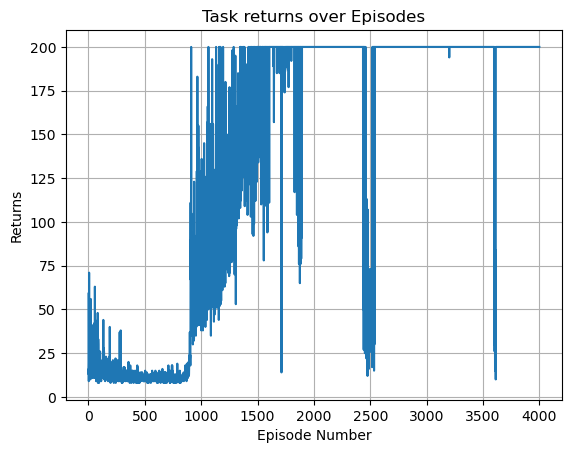

In [15]:
# Visualize the DQN training plots for the cartpole 
if not skip_training:
    t.plot(save_name='cartpole_dqn.png', cfg_path=Path().cwd()/'cfg'/'cartpole_dqn.yaml',)

In order to get full points from the task make sure most of the test episodes give a reward of 200, given the seeds below (at least 50% of episodes).

In [16]:
if not skip_training:
    t.test(agent, cfg_path=Path().cwd()/'cfg'/'cartpole_dqn.yaml', cfg_args=dict(save_video=True), seeds=[67, 23, 89, 12, 45, 78, 34, 90, 21, 56])

Numpy/Torch/Random Seed:  436
{'episode': 0, 'ep_reward': 200.0}
{'episode': 1, 'ep_reward': 200.0}
{'episode': 2, 'ep_reward': 200.0}
{'episode': 3, 'ep_reward': 200.0}
{'episode': 4, 'ep_reward': 200.0}
{'episode': 5, 'ep_reward': 200.0}
{'episode': 6, 'ep_reward': 200.0}
{'episode': 7, 'ep_reward': 200.0}
{'episode': 8, 'ep_reward': 200.0}
{'episode': 9, 'ep_reward': 200.0}


In [17]:
%%capture --no-stdout
"TEST"

In [18]:
if not skip_training:
      video = Video(Path().cwd()/'results'/'CartPole-v1'/'video'/'test'/'ex4_dqn-episode-0.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
      display(video)

In [19]:
# init agent
with open(Path().cwd()/'cfg'/'lunarlander_dqn.yaml', 'r') as f:
    cfg = t.Struct(**yaml.safe_load(f))
    
agent = DQNAgent(state_shape=cfg.state_shape, n_actions=cfg.n_actions, batch_size=cfg.batch_size, hidden_dims=cfg.hidden_dims,
                 gamma=cfg.gamma, lr=cfg.lr, tau=cfg.tau)

In [20]:
# Trainig takes approximately 60 mins,depends on server
if not skip_training:
    t.train(agent, cfg_path=Path().cwd()/'cfg'/'lunarlander_dqn.yaml', cfg_args=dict()) 

Numpy/Torch/Random Seed:  436
{'ep_reward': -273.70199259641, 'episode': 0, 'epsilon': 1.0, 'ep_avr': 0.009327070030849427, 'ts_avr': 8.666542690303741e-05}
{'ep_reward': -171.4852210876229, 'episode': 100, 'epsilon': 0.6666666666666666, 'ep_avr': 0.2214422108477447, 'ts_avr': 0.0019194501575387456, 'loss': 29.537839889526367, 'q_mean': -7.289341449737549, 'num_update': 10628, 'update_time': 0.001730357005726546}
{'ep_reward': 33.64053662205902, 'episode': 200, 'epsilon': 0.5, 'ep_avr': 0.325969677848625, 'ts_avr': 0.002090872978942398, 'loss': 26.859769821166992, 'q_mean': -5.797952175140381, 'num_update': 26197, 'update_time': 0.0027020819834433496}
{'ep_reward': 13.965882077297753, 'episode': 300, 'epsilon': 0.4, 'ep_avr': 0.5812473975011381, 'ts_avr': 0.0021028733819898116, 'loss': 10.4520263671875, 'q_mean': 8.260902404785156, 'num_update': 53814, 'update_time': 0.0020444290130399168}
{'ep_reward': 41.21887137878068, 'episode': 400, 'epsilon': 0.3333333333333333, 'ep_avr': 0.80534

Numpy/Torch/Random Seed:  436


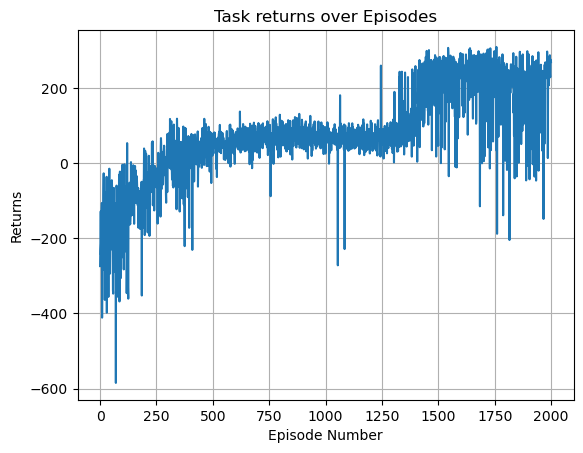

In [21]:
# Visualize the DQN training plots for the lunarlander task
if not skip_training:
    t.plot(save_name='lunarlander_dqn.png', cfg_path=Path().cwd()/'cfg'/'lunarlander_dqn.yaml', cfg_args=dict())

In order to get full points from the task make sure most of the test episodes give a reward of 200, given the seeds below (at least 50% of episodes).

In [22]:
if not skip_training:
    t.test(agent, cfg_path=Path().cwd()/'cfg'/'lunarlander_dqn.yaml', cfg_args=dict(save_video=True),seeds=[67, 23, 89, 12, 45, 78, 34, 90, 21, 56])

Numpy/Torch/Random Seed:  436
{'episode': 0, 'ep_reward': 2.4886985637728287}
{'episode': 1, 'ep_reward': 279.14387477565884}
{'episode': 2, 'ep_reward': 241.225236663442}
{'episode': 3, 'ep_reward': 78.85722563706157}
{'episode': 4, 'ep_reward': 244.55337016973806}
{'episode': 5, 'ep_reward': 252.15967398703813}
{'episode': 6, 'ep_reward': 263.5074954823923}
{'episode': 7, 'ep_reward': 219.18857545718984}
{'episode': 8, 'ep_reward': 263.99690543951044}
{'episode': 9, 'ep_reward': 263.38231076728846}


In [23]:
%%capture --no-stdout
"TEST"

In [26]:
if not skip_training:
  video = Video(Path().cwd()/'results'/'LunarLander-v2'/'video'/'test'/'ex4_dqn-episode-4.mp4',
  embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control
  display(video)

<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.1</b> Considering Continuous Action Spaces (5 points) </h3> 
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


### 1.1.1 Question (5 points):
Can Q-learning be used directly in environments with continuous action spaces?

**Select one:**

1. Yes, Q-learning can be used directly without any modifications.
2. No, Q-learning cannot be used directly because it only works with a discrete set of actions.
3. No, Q-learning cannot be used directly in continuous action spaces, but it can be adapted with certain modifications.
4. Yes, Q-learning can be used directly, but it is less efficient than in discrete action spaces.

In [27]:
sq_1_1_1 = 3 # Replace with the appropriate answer number

The following cells are used for grading

In [28]:
assert sq_1_1_1 in range(1, 5)

<a id='Q2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.2</b> Continuous Action Spaces Part 1 (15 points) </h3> 
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


### 1.2.1 Question (5 points):

What is the primary challenge when applying DQN to a continuous action space? Hint: select the one that describes the main issue.

**Select one:**

1. Updating the Q values
2. Storing the Q values
3. Performing the maximization (argmax) operation
4. Calculating the loss function
5. Calculating the reward

In [29]:
sq_1_2_1 = 3 # Replace with the appropriate answer number

### 1.2.2 Question (5 points):

Which one of the following methods does NOT address the continuous action space problem in DQN?

**Select one:**

1. Learn a function approximation for the maximum of the Q-function
2. Use a policy to draw samples of Q(s,a) and select the action with the highest Q-value (e.g., MPO)
3. Approximate the Q-function as a convex function
4. Use a Deep Deterministic Policy Gradient (DDPG) approach to learn a policy and Q-function simultaneously
5. Use a Double DQN approach with two separate networks to estimate Q-values for continuous actions
6. Discretize the action space with fine-grained intervals

In [30]:
sq_1_2_2 = 5 # Replace with the appropriate answer number

### 1.2.3 Question (5 points):

Discretization is one approach to address the continuous action space problem. What is a **significant** limitation of discretizing the action space to address the continuous action space problem in DQN?

**Select one:**

1. It may not generalize well to actions outside the discrete set
2. It increases the size of the state space exponentially
3. It requires modifying the neural network architecture
4. It can lead to unstable learning in the early stages of training
5. It makes the reward function non-differentiable

In [39]:
sq_1_2_3 = 1 # Replace with the appropriate answer number

The following cells are used for grading

In [40]:
assert sq_1_2_1 in range(1, 6)
assert sq_1_2_2 in range(1, 7)
assert sq_1_2_3 in range(1, 6)

<a id='Q3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.3</b> The Target Network (10 points) </h3> 
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


### 1.3.1 Question (5 points):

Why do we use a separate target network in DQN instead of using the same network for both Q(s,a) and max_a(Q(s', ·))?

**Select one:**

1. To prevent the network from overfitting to the most recent transitions
2. To ensure that the Q-values are always within a specific range
3. To stabilize the training process by preventing frequent changes in target values
4. To enable the network to learn from both on-policy and off-policy data

In [36]:
sq_1_3_1 = 3 # Replace with the appropriate answer number

### 1.3.2 Question (5 points):

What would happen if we don't stop the gradient of the target Q-value in DQN?

**Select one:**

1. The optimization process would become more stable due to the joint updates
2. The target network updates would be synchronized with the main network updates
3. Both the current Q-values and the target Q-values would be updated during optimization
4. The algorithm would effectively switch to an on-policy learning method

In [37]:
sq_1_3_2 = 3 # Replace with the appropriate answer number

The following cells are used for grading

In [38]:
assert sq_1_3_1 in range(1, 5)
assert sq_1_3_2 in range(1, 5)

# 3. Submitting <a id='3.'></a>
Ensure all tasks and questions (in ```ex4_dpn.ipynb``` and ```ex4_rbf.ipynb```) are answered and and that the necessary plots are saved in the appropriate locations. The relevant plots and files needed to be submitted for this assignment are:


- Training performance plots:
  - `cartpole_dqn.png`: Cartpole, training performance plots in terms of episode and episodic reward
  - `lunarlander_dqn.png`: Lunarlander, training performance plots in terms of episode and episodic reward 
<br>
<br>

  

- Model files:
  - `dqn.pt`: Trained model


Ensure the model files and plots are saved in correct paths:
- ```results/CartPole-v1/cartpole_dqn``` Training result for Cartpole environment
- ```results/CartPole-v1/model/dqn.pt``` Model for Cartpole environment
- ```results/LunarLander-v2/lunarlander_dqn.png``` Training result for LunarLander environment
- ```results/LunarLander-v2/model/dqn.pt``` Model for LunarLander environment


<span style="color:red"> **# IMPORTANT: DO NOT FORGET ANOTHER TASK IN ```ex4_rbf.ipynb```** </span>

In [42]:
# Make sure that skip training is set to True before submission
assert skip_training == True

## 3.1 Feedback <a id='3.1'></a>

In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer to the following questions in your submission:

1) How much time did you spend solving this exercise? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 5.43)

In [33]:
hrs = 10

2) Difficulty of each task/question from 1-5 (int or float)

In [32]:
T1 = 4   # Implementing DQN (10 points)
Q1_1 = 3 # Question 1.1 Considering Continuous Action Spaces (5 points)
Q1_2 = 3 # Question 1.2 Continuous Action Spaces Part 1 (15 points)
Q1_3 = 3 # Question 1.3 The Target Network (10 points)

3) How well did you understand the content of the task/question from 1-5? (int or float)

In [31]:
T1 = 3   # Implementing DQN (10 points)
Q1_1 = 3 # Question 1.1 Considering Continuous Action Spaces (5 points)
Q1_2 = 3 # Question 1.2 Continuous Action Spaces Part 1 (15 points)
Q1_3 = 3 # Question 1.3 The Target Network (10 points)

4) General feedback. Consider questions like:

    - Did the content of the lecture relate well with the assignment?
    - To what extent did you find the material to be potentially useful for your research and studies?
    
Please share any additional feedback, suggestions, or comments you have about the lecture, assignment, or course content. Your input is valuable in helping us improve the learning experience.

DOUBLE CLICK HERE TO EDIT, CLEAR THIS TEXT AND ANSWER HERE